# Team 40 | Data EDA/Cleaning

*Natural Disaster Projection Due To Climate Change Effects*

* Luis Ruiz Ponce.
* Simón Vallejo.
* Malcom Giraldo.
* Christian Fuertes.
* Juan Felipe Monsalvo.
* Sandra Barreto.
* Guillermo Giraldo.
* Francisco Rodriguez.


## Libraries import

In [ ]:
import os
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Function definition

In [ ]:
def missing_percentage(df):
  """
  This function calculate the percentage of missing values by columns in a dataframe
  INPUT:
    df: Pandas dataframe to analyze
  RETURN:
    missing_df: df containing the number and percentage of missing in every columns
  """
  missing_df = df.isnull().sum().to_frame().reset_index()
  missing_df.columns=["Features", "# Missing Values"]
  missing_df["% of Missing Values"] = (missing_df["# Missing Values"] / len(df) ) * 100

  return missing_df

##Mounting the Google Drive

In [ ]:
# Loading our own drive from google
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Exploring the folders

In [ ]:
# Path variables
data_path = '/drive/MyDrive/DS4A - Team 40/00_DATA'
raw_data_path = data_path + '/00_RAW_DATA'
clean_data_path = data_path + '/01_CLEAN_DATA'
html_data_path = data_path + '/XX_HTML'

In [ ]:
# All the files and folders under our path
print(f'These are the files inside directory 00_DATA {os.listdir(data_path)}')
print(f'These are the files inside directory 00_DATA/00_RAW_DATA {os.listdir(raw_data_path)}')
print(f'These are the files inside directory 00_DATA/01_CLEAN_DATA {os.listdir(clean_data_path)}')
print(f'These are the files inside directory 00_DATA/01_CLEAN_DATA {os.listdir(html_data_path)}')

These are the files inside directory 00_DATA ['00_RAW_DATA', '01_CLEAN_DATA', 'XX_HTML', 'Data_EDA_Country | Team 40.ipynb', 'EDA.oxps', 'Images', 'Data_EDA Test| Team 40.ipynb', 'Data_EDA_Luis | Team 40.ipynb', 'Data_EDA Climate| Team 40.ipynb', 'Read_netCDF - Climate| Team 40.ipynb', '01_Visualization_Disasters| Team 40.ipynb', 'Visualization_Temp_Disasters_Subgroup| Team 40.ipynb', 'Visualization_Temp_Disasters_Type| Team 40.ipynb', 'Visualization_Temp| Team 40.ipynb', 'Data_EDA Disasters| Team 40.ipynb']
These are the files inside directory 00_DATA/00_RAW_DATA ['GlobalLandTemperaturesByCity.csv', 'GlobalLandTemperaturesByCountry.csv', 'GlobalTemperatures.csv', 'GlobalLandTemperaturesByState.csv', 'GlobalLandTemperaturesByMajorCity.csv', 'DISASTERS', 'New', 'new_disaster_data_EXCEL.xlsx', 'disaster_data.csv', 'climatology_Months.nc', 'climatology_Year.nc', 'Temperature_by_countries', 'temp_mean.7z', 'tas_timeseries_monthly_cru_1901-2020_ABW.csv', 'Temperature_by_countries_fixed', 't

## Loading & Cleaning Data

### Disasters data

#### disaster_data.csv

In [ ]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/disaster_data.csv'
df_disaster = pd.read_csv(filename, delimiter=";")

print(f'This is the file being loaded {filename}')
df_disaster.head()

This is the file being loaded /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/disaster_data.csv


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"3,077090909",NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"3,077090909",NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,781207.0,"3,200174545",NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,"3,200174545",NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,"3,200174545",NaN,NaN,NaN,NaN


This dataset comes from the following source: https://www.emdat.be/. It is really important to read and to understand the included guidelines. 

**Level 1 – Disaster event**

**Disaster Number**: A unique 8 digit disaster number is generated for each disaster event. The “DisN°” includes the year (4 digits) and a sequential number (4 digits) which is unique for each disaster event (i.e. Tsunami 2004 = DisN° 2004-0659).

**Disaster group**: Two main groups of disasters are distinguished in EM-DAT: natural disasters and technological disasters. This field is automatically linked to the disaster sub-group and the disaster type.  There is a third group ‘Complex disasters’ which include some major famine situation for which the drought were not the main causal factor. 

**Disaster sub-group**: The natural disaster category is divided into 6 sub-groups: Biological, Geophysical, Climatological, Hydrological, Meteorological and Extra-terrestrial disasters.  

**Disaster type**:  1 main disaster type is identified per event. This field is automatically linked to the disaster sub-group and the disaster group. Two or more disasters may be related (a disaster may occur as a consequence of a primary event). For example, a cyclone may generate a flood or a landslide; or an earthquake may cause a gas line to rupture, causing an ecological disaster. The primary disaster type (or triggering event) is recorded first, followed by the Associated Disaster 1 and 2 fields by the secondary ones.

**Disaster sub-type**: Subdivision related to the disaster type.

**Disaster sub-sub-type**: Any appropriate sub-division of the disaster sub-type (not applicable for all disaster sub-types).

**Event name**: Any specification related to the disaster which allow its identification (i.e. “Mitch” for the name of storm, “Boeing 707” for the type of plane in an air crash, name of the diseases such as “Cholera” for an epidemic, “Etna” for the name of the volcano, etc.)

**Glide Number**: The GLobal IDEntifier number (GLIDE; find out more) is a globally common Unique ID code for disasters intended to facilitate linkages between records in diverse disaster databases and disaster exchange information websites such as ReliefWeb.

**Level 2 – Country/countries** 

*Geographical information*

**Country**: The country  in which the disaster has occurred or  had an impact; with the name and spelling being taken from standard list of country names published by the International Standards Organization (ISO). If a disaster has affected more than one country, there will be one entry for each country.

**ISO Code**: The International Organization for Standardization attributes a 3-letter code to each country. CRED uses the ISO 3166. This field is automatically linked to the country.

**Region**: The region to which the country belongs. This field is automatically linked to the country.  CRED use the UN regional division. 

**Continent**: The continent to which the country belongs. This field is automatically linked to the country.

**River basin**: Name of the river basins of the affected area (used usually for flood event).

**Latitude**: North-South coordinates; when available (used for earthquakes, volcanoes and floods)

**Longitude**: East-West coordinates; when available (used for earthquakes, volcanoes and floods)

**Location**: Geographical specification (e.g. name of a city, village, department, province, state, or district). This allows for the subsequent analysis of disaster occurrence and impact by region, district or any other sub-national administrative boundary.

*Temporal information*

**Start day/month/year**: The date when the disaster occurred. This date is well defined for all sudden-impact disasters. For disaster situations developing gradually over a longer time period (i.e. drought) with no onset date, the field « day » can be left blank.

**End day/month/year**: The date when the disaster ended. This date is well defined for all sudden-impact disasters. For disaster situations ending over a longer time period (i.e. drought) with no definite concluding date, the field « day » can be left blank.

**Local time**: The local time when the disaster occurred (given for sudden disasters like earthquakes and volcanoes).

*Physical characteristics*

**Origin**: The triggering origin of the disaster (i.e.  Heavy rains for a flood, drought for a forest fire).

**Associated disasters 1 and 2**: The secondary and /or associated effects or consequences of a primary event (i.e. Landslide for a flood, explosion after an earthquake, etc …)

**Disaster magnitude scale and value**: The “intensity “of a specific disaster (the unit is automatically linked to the disaster type)

* Earthquake: Richter Scale
* Flood: Km² (area covered)
* Drought : Km² (area covered)
* Insect Infestation: Km² (area covered)
* Extreme Temperature: °C (minimum or maximum value)
* Epidemic: Number of Vaccinated
* Wild fire: Km2 (area covered)
* Storm: kph (speed of wind)
* Radiation: curies
* Chemical spill: m³

*Human impact*

**Total deaths**: deaths + missing people

**Injured**: People suffering from physical injuries, trauma, or an illness requiring immediate medical assistance as a direct result of a disaster.

The number of injured people is entered when the term “injured” is written in the source. The injured are always part of the "total affected". 

**Affected**: People requiring immediate assistance during an emergency situation. The indicator affected is often reported and is widely used by different actors to convey the extent, impact, or severity of a disaster in non-spatial terms.  The ambiguity in the definitions and the different criteria and methods of estimation produce vastly different numbers, which are rarely comparable. 

**Homeless**: Number of people whose house is destroyed or heavily damaged and therefore need shelter after an event.

*Economic impact*

**Total estimated damages (in 000'US$ in the value of the year of occurrence, unadjusted for inflation)**: A value of all damages and economic losses directly or indirectly related to the disaster. The information may include the breakdown figures by sectors: Social, Infrastructure, Production, Environment and other (when available).

**Reconstruction cost (in 000'US$ in the value of the year of occurrence, unadjusted for inflation)**: These costs are for the replacement of lost assets. Reconstruction costs are different than total damages as they must take into account present construction or purchase costs of goods, as well as the additional cost of prevention and mitigation measures to reduce damage from future disasters.

**Insured losses (in 000'US$ in the value of the year of occurrence, unadjusted for inflation)**: Economic damages which are covered by the insurance companies.

**Total estimated damages (in 000'US adjusted value)**, 
**Reconstruction cost (in 000'US adjusted value)** 
and
**Insured losses (in 000'US adjusted value)**: Same indicators but adjusted to the 2020 US$ value.

**CPI** : Consumer Price Index, used to convert the damages (which are given at the time the disaster occured) to the curent US$ value.

##### Exploration

In [ ]:
print(f'There is a total of {len(df_disaster.columns.values)} columns which have the following names: \n {df_disaster.columns.values}')

There is a total of 50 columns which have the following names: 
 ['Dis No' 'Year' 'Seq' 'Glide' 'Disaster Group' 'Disaster Subgroup'
 'Disaster Type' 'Disaster Subtype' 'Disaster Subsubtype' 'Event Name'
 'Country' 'ISO' 'Region' 'Continent' 'Location' 'Origin' 'Associated Dis'
 'Associated Dis2' 'OFDA Response' 'Appeal' 'Declaration'
 'Aid Contribution' 'Dis Mag Value' 'Dis Mag Scale' 'Latitude' 'Longitude'
 'Local Time' 'River Basin' 'Start Year' 'Start Month' 'Start Day'
 'End Year' 'End Month' 'End Day' 'Total Deaths' 'No Injured'
 'No Affected' 'No Homeless' 'Total Affected'
 "Reconstruction Costs ('000 US$)"
 "Reconstruction Costs, Adjusted ('000 US$)" "Insured Damages ('000 US$)"
 "Insured Damages, Adjusted ('000 US$)" "Total Damages ('000 US$)"
 "Total Damages, Adjusted ('000 US$)" 'CPI' 'Adm Level' 'Admin1 Code'
 'Admin2 Code' 'Geo Locations']


In [ ]:
df_disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     16354 non-null  object 
 1   Year                                       16354 non-null  int64  
 2   Seq                                        16354 non-null  int64  
 3   Glide                                      1637 non-null   object 
 4   Disaster Group                             16354 non-null  object 
 5   Disaster Subgroup                          16354 non-null  object 
 6   Disaster Type                              16354 non-null  object 
 7   Disaster Subtype                           13142 non-null  object 
 8   Disaster Subsubtype                        1092 non-null   object 
 9   Event Name                                 3927 non-null   object 
 10  Country               

We can see that the data set has a lot of missings items, but it is clearer to see with the following code:

In [ ]:
missing_value = missing_percentage(df_disaster)
missing_value.sort_values(by="% of Missing Values", ascending = False)

,Features,# Missing Values,% of Missing Values
39,Reconstruction Costs ('000 US$),16321,99.798215
40,"Reconstruction Costs, Adjusted ('000 US$)",16321,99.798215
21,Aid Contribution,15677,95.860340
17,Associated Dis2,15631,95.579063
8,Disaster Subsubtype,15262,93.322734
42,"Insured Damages, Adjusted ('000 US$)",15251,93.255473
41,Insured Damages ('000 US$),15250,93.249358
26,Local Time,15236,93.163752
27,River Basin,15054,92.050874
3,Glide,14717,89.990216


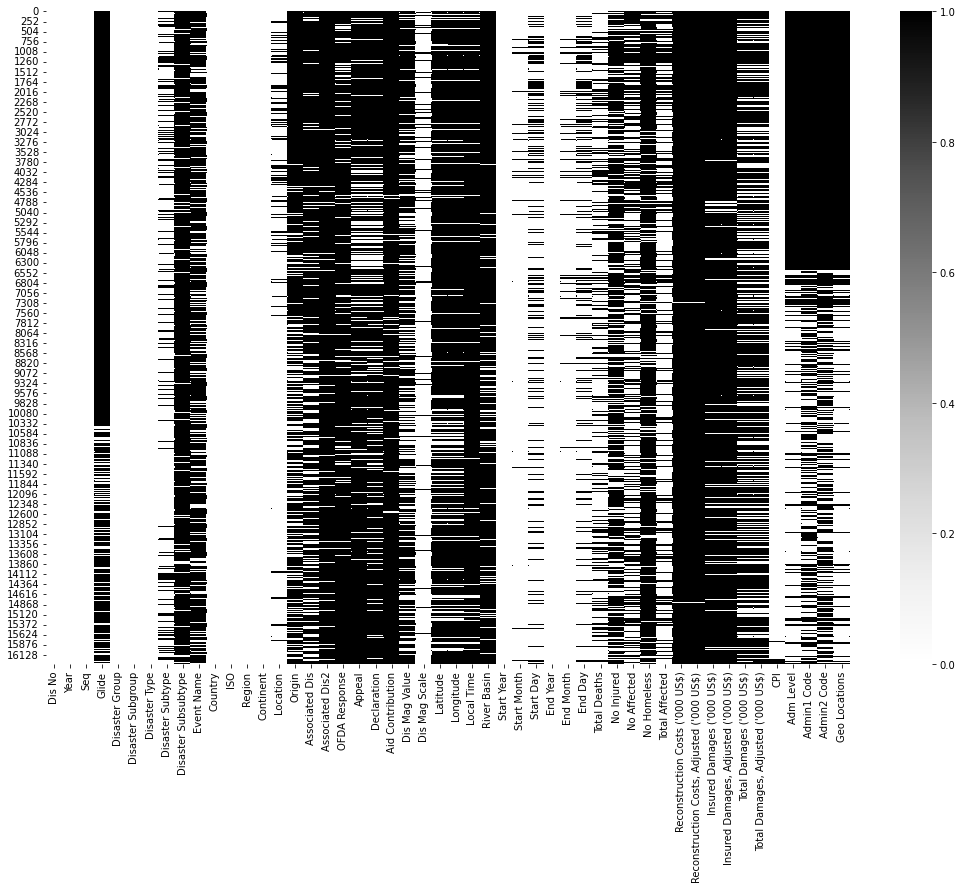

In [ ]:
fig = plt.figure(figsize=(18,12))
sns.heatmap(df_disaster.isnull(), cmap="Greys")

Even though we are tempted to delete the columns that have high percertange of null values, we will proceed to check the columns per similar groups and we will only delete those columns we don't really need.

##### Date variables
We will check the columns that have relevant date information.

In [ ]:
date_variable = ["Dis No", "Year", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day", "Local Time"]
df_disaster[date_variable].head(10)

,Dis No,Year,Start Year,Start Month,Start Day,End Year,End Month,End Day,Local Time
0,1900-9002-CPV,1900,1900,NaN,NaN,1900,NaN,NaN,NaN
1,1900-9001-IND,1900,1900,NaN,NaN,1900,NaN,NaN,NaN
2,1902-0012-GTM,1902,1902,4.0,18.0,1902,4.0,18.0,20:20
3,1902-0003-GTM,1902,1902,4.0,8.0,1902,4.0,8.0,NaN
4,1902-0010-GTM,1902,1902,10.0,24.0,1902,10.0,24.0,NaN
5,1903-0006-CAN,1903,1903,4.0,29.0,1903,4.0,29.0,NaN
6,1903-0012-COM,1903,1903,NaN,NaN,1903,NaN,NaN,NaN
7,1904-0003-BGD,1904,1904,11.0,NaN,1904,11.0,NaN,NaN
8,1905-0005-CAN,1905,1905,8.0,13.0,1905,8.0,13.0,NaN
9,1905-0003-IND,1905,1905,4.0,4.0,1905,4.0,4.0,06:20


Since our granularity will be in years and months, we can delete the day and hours columns.

In [ ]:
df_disaster.drop(["Start Day","Local Time", "End Day"], axis=1, inplace=True)

In [ ]:
date_variable = ["Dis No","Disaster Subgroup", "Disaster Type", "Year", "Start Year", "Start Month", "End Year", "End Month"]
df_disaster[date_variable].head(10)

,Dis No,Disaster Subgroup,Disaster Type,Year,Start Year,Start Month,End Year,End Month
0,1900-9002-CPV,Climatological,Drought,1900,1900,NaN,1900,NaN
1,1900-9001-IND,Climatological,Drought,1900,1900,NaN,1900,NaN
2,1902-0012-GTM,Geophysical,Earthquake,1902,1902,4.0,1902,4.0
3,1902-0003-GTM,Geophysical,Volcanic activity,1902,1902,4.0,1902,4.0
4,1902-0010-GTM,Geophysical,Volcanic activity,1902,1902,10.0,1902,10.0
5,1903-0006-CAN,Geophysical,Mass movement (dry),1903,1903,4.0,1903,4.0
6,1903-0012-COM,Geophysical,Volcanic activity,1903,1903,NaN,1903,NaN
7,1904-0003-BGD,Meteorological,Storm,1904,1904,11.0,1904,11.0
8,1905-0005-CAN,Geophysical,Mass movement (dry),1905,1905,8.0,1905,8.0
9,1905-0003-IND,Geophysical,Earthquake,1905,1905,4.0,1905,4.0


We can verify if the Start Year and End Year columns have the same data. We can also verify if Year column has the same data as Start Year column.

In [ ]:
df_disaster["Start Year"].equals(df_disaster['End Year'])

False

We can see that there are disasters that have duration longer than a year. 

In [ ]:
tamaño = len(df_disaster.loc[~(df_disaster['Start Year'] == df_disaster['End Year'])])
print(f"There are {tamaño} records where the End Year is different than the Start Year")

df_disaster.loc[~(df_disaster['Start Year'] == df_disaster['End Year'])][date_variable].head()

There are 618 records where the End Year is different than the Start Year


,Dis No,Disaster Subgroup,Disaster Type,Year,Start Year,Start Month,End Year,End Month
24,1910-9006-BFA,Climatological,Drought,1910,1910,NaN,1914,NaN
27,1910-9006-CPV,Climatological,Drought,1910,1910,NaN,1914,NaN
30,1910-9006-GMB,Climatological,Drought,1910,1910,NaN,1914,NaN
31,1910-9006-GNB,Climatological,Drought,1910,1910,NaN,1914,NaN
50,1919-9006-AIA,Climatological,Drought,1919,1919,NaN,1923,NaN


Filtering these disasters we can see that they are associated to certain types of disasters likes Droughts, Floods or Epidemics. 

In [ ]:
df_disaster.loc[~(df_disaster['Start Year'] == df_disaster['End Year'])]["Disaster Type"].value_counts()

Drought                294
Epidemic               173
Flood                   85
Extreme temperature     41
Storm                    9
Wildfire                 5
Volcanic activity        4
Landslide                3
Insect infestation       3
Earthquake               1
Name: Disaster Type, dtype: int64

It calls our attention that Earthquakes and Volcanic activity are placed on the list. We will take a special look to these records. 

In [ ]:
df_Earthquake = df_disaster.loc[(~(df_disaster['Start Year'] == df_disaster['End Year']))]
df_Earthquake[df_Earthquake["Disaster Type"] == "Earthquake"][date_variable]
df_Earthquake[df_Earthquake["Disaster Type"] == "Earthquake"]

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
15274,1969-0155-MAR,1969,155,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"13,53780013",NaN,NaN,NaN,NaN


As we can see, the End Date of the volcanic activity is 2019. We can consider this as an error. We will correct it in the dataset. 

In [ ]:
df_disaster.loc[15274]['End Year']

2019

In [ ]:
df_disaster.at[15274, 'End Year'] = df_disaster.loc[15274]['Start Year']
df_disaster.loc[15274]['End Year']

1969

Checking the volcanic activity records.

In [ ]:
df_volcanic = df_disaster.loc[(~(df_disaster['Start Year'] == df_disaster['End Year']))]
df_volcanic[df_volcanic["Disaster Type"] == "Volcanic activity"][date_variable]

,Dis No,Disaster Subgroup,Disaster Type,Year,Start Year,Start Month,End Year,End Month
11077,2008-0659-VUT,Geophysical,Volcanic activity,2008,2008,12.0,2009,4.0
12787,2013-0355-PER,Geophysical,Volcanic activity,2013,2013,9.0,2014,5.0
13059,2014-0478-CPV,Geophysical,Volcanic activity,2014,2014,11.0,2015,1.0
13205,2015-0550-ECU,Geophysical,Volcanic activity,2015,2015,11.0,2016,3.0


The volcanic activity records make sense.

We will check the Start Year column agains the Year column, to check if they are equal. 

In [ ]:
df_disaster["Year"].equals(df_disaster['Start Year'])

False

Columns are not identical. We can procede to check the divergent points. 

In [ ]:
tamaño = len(df_disaster.loc[~(df_disaster['Year'] == df_disaster['Start Year'])])
print(f"There are {tamaño} records where the End year is different than the Start Year")

df_disaster.loc[~(df_disaster['Year'] == df_disaster['Start Year'])][date_variable].tail()

There are 130 records where the End year is different than the Start Year


,Dis No,Disaster Subgroup,Disaster Type,Year,Start Year,Start Month,End Year,End Month
15542,2020-0051-IRL,Meteorological,Storm,2020,2021,5.0,2021,5.0
15567,2020-0051-IMN,Meteorological,Storm,2020,2021,5.0,2021,5.0
15903,2019-0630-SDN,Biological,Insect infestation,2019,2020,2.0,2020,2.0
15905,2019-0630-UGA,Biological,Insect infestation,2019,2020,2.0,2020,2.0
15947,2019-0630-TZA,Biological,Insect infestation,2019,2020,2.0,2020,2.0


We can use the "Start Year" column as initial date, which allows us to delete the "Year" column. Likewise, we can delete the "Dis No" column, since its data is already contained in other columns.



In [ ]:
df_disaster["Year"] = df_disaster["Start Year"]
df_disaster.drop(["Dis No", "Start Year"], axis=1, inplace=True)

Let's check how many records we have per year.

In [ ]:
# Checking how many records we have per year. 
columna_analizar = "Year"
disasters_by_year = df_disaster[columna_analizar].value_counts().to_frame().reset_index()
disasters_by_year.columns = [columna_analizar, "Count"]
disasters_by_year = disasters_by_year.sort_values(by=columna_analizar,ascending = False )
disasters_by_year.head(10)

,Year,Count
44,2022,121
6,2021,437
11,2020,405
7,2019,436
23,2018,334
17,2017,371
21,2016,349
12,2015,403
22,2014,342
20,2013,355


In [ ]:
fig = px.line(disasters_by_year, x="Year", y="Count", title='# Disasters by Year')
fig.show()

We decided to keep data in a range from 1960 to 2021, which coincide with the climate data period we have in our datasets. 

In [ ]:
df_disaster_filter = df_disaster[(df_disaster["Year"] >= 1960) & (df_disaster["Year"] < 2022) ]
df_disaster_filter["Year"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1972,
       1971, 1970, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1983, 1980,
       1982, 1981, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1992, 1991,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
# Checking how many records we have per year
columna_analizar = "Year"
disasters_by_year = df_disaster_filter[columna_analizar].value_counts().to_frame().reset_index()
disasters_by_year.columns = [columna_analizar, "Count"]
disasters_by_year = disasters_by_year.sort_values(by=columna_analizar,ascending = False )

fig = px.line(disasters_by_year, x="Year", y="Count", title='# Disasters by Year')
fig.show()

We can tell that a rise in the quantity of disasters is present during most recent years, reaching a peak in the year 2000. 

Analyzing disaster date per year and type of disaster.

In [ ]:
# Checking how many records we have per year
disasters_by_year_subgroup = df_disaster_filter.groupby(by=["Year","Disaster Subgroup"])["Country"].count().reset_index()

disasters_by_year_subgroup.columns = ["Year","Disaster Subgroup", "Count"]
disasters_by_year_subgroup

,Year,Disaster Subgroup,Count
0,1960,Climatological,1
1,1960,Geophysical,9
2,1960,Hydrological,9
3,1960,Meteorological,20
4,1961,Climatological,1
...,...,...,...
301,2021,Biological,6
302,2021,Climatological,36
303,2021,Geophysical,37
304,2021,Hydrological,234


In [ ]:
fig = px.line(disasters_by_year_subgroup, x="Year", y="Count", color='Disaster Subgroup', title='# Disasters by Year')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

With this graph it becomes evident that the Hydrological and Meteorological disasters are the ones that rised more, which gives us a little clue of which disasters could be related to climate change. 

Analyzing disasters by subtype.

In [ ]:
df_disaster_filter["Disaster Subgroup"].value_counts()

Hydrological         6224
Meteorological       4844
Biological           1567
Geophysical          1509
Climatological       1209
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64

In [ ]:
df_disaster_filter[df_disaster_filter["Disaster Subgroup"] == "Meteorological"]["Disaster Type"].value_counts()

Storm                  4251
Extreme temperature     593
Name: Disaster Type, dtype: int64

In [ ]:
#
filtro = "Meteorological"
df_disaster_filter_Subgroup = df_disaster_filter[df_disaster_filter["Disaster Subgroup"] == filtro]

disasters_by_year_type = df_disaster_filter_Subgroup.groupby(by=["Year","Disaster Type"])["Country"].count().reset_index()

disasters_by_year_type.columns = ["Year","Disaster Type", "Count"]
disasters_by_year_type

fig = px.line(disasters_by_year_type, x="Year", y="Count", color='Disaster Type', title=f'# Disasters by Year by {filtro}')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

In [ ]:
filtro = "Hydrological"
df_disaster_filter_Subgroup = df_disaster_filter[df_disaster_filter["Disaster Subgroup"] == filtro]

disasters_by_year_type = df_disaster_filter_Subgroup.groupby(by=["Year","Disaster Type"])["Country"].count().reset_index()

disasters_by_year_type.columns = ["Year","Disaster Type", "Count"]
disasters_by_year_type

fig = px.line(disasters_by_year_type, x="Year", y="Count", color='Disaster Type', title=f'# Disasters by Year by {filtro}')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

We can see how the Floods and Storms are the most rising disaster types in the last years.

##### Disaster Variables

To understand the disaster types and categorization we can check the following web page:
https://www.emdat.be/classification

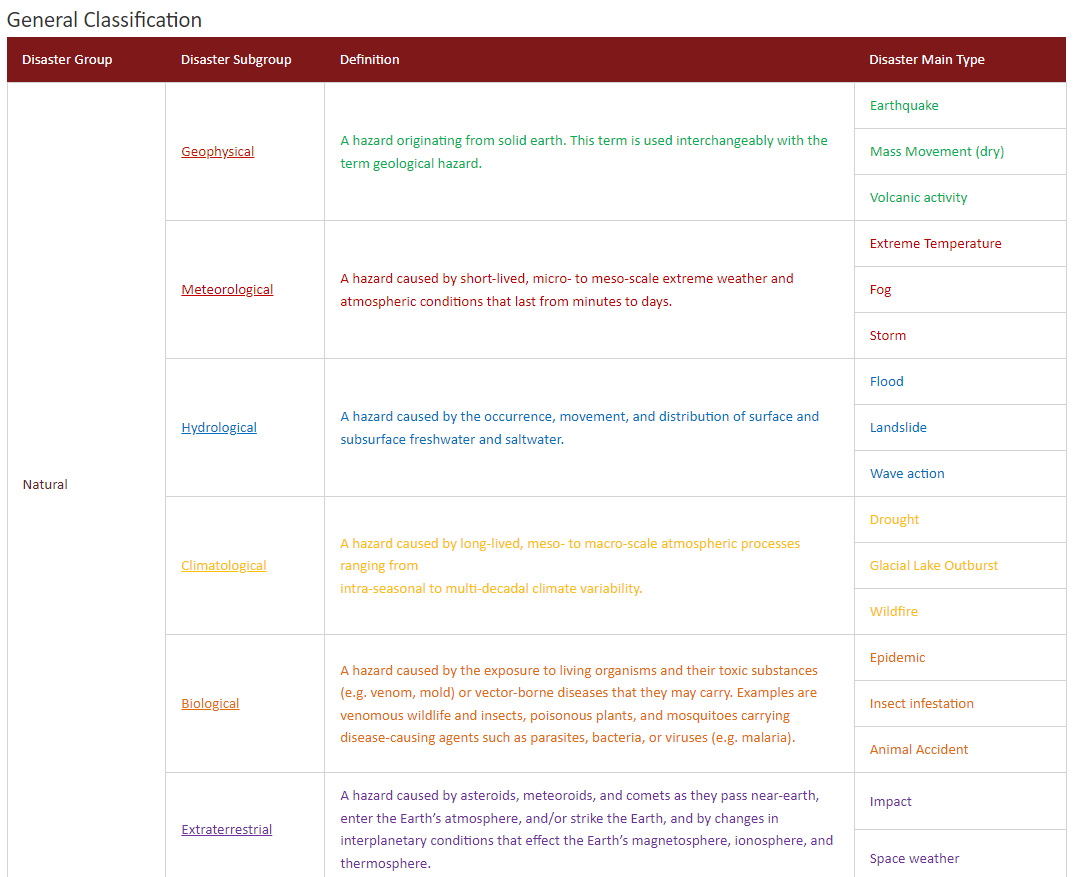

When we check the records inside Disaster group we can see that there's only one group called Natural. This column doesn't add any value and we will proceed to delete it.

In [ ]:
df_disaster_filter["Disaster Group"].unique()

array(['Natural'], dtype=object)

In [ ]:
df_disaster_filter = df_disaster_filter.drop("Disaster Group", axis=1)

Checking the categories in Disaster Subgroup

In [ ]:
df_disaster_filter["Disaster Subgroup"].value_counts()

Hydrological         6224
Meteorological       4844
Biological           1567
Geophysical          1509
Climatological       1209
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64

From the initial definition we can decide that we can delete all entries that have the value "disaster Subgroup" as 'Extra-terrestrial'.

In [ ]:
df_disaster_filter = df_disaster_filter[~(df_disaster_filter["Disaster Subgroup"] == "Extra-terrestrial")]
df_disaster_filter["Disaster Subgroup"].value_counts()

Hydrological      6224
Meteorological    4844
Biological        1567
Geophysical       1509
Climatological    1209
Name: Disaster Subgroup, dtype: int64

Checking the disaster types.

In [ ]:
df_disaster_filter["Disaster Type"].value_counts()

Flood                    5484
Storm                    4251
Epidemic                 1473
Earthquake               1231
Drought                   743
Landslide                 740
Extreme temperature       593
Wildfire                  464
Volcanic activity         235
Insect infestation         93
Mass movement (dry)        43
Glacial lake outburst       2
Animal accident             1
Name: Disaster Type, dtype: int64

Animal accident and Glacial lake outburst disasters don't have a lot of weight in our analysis since they have close to zero records.

In [ ]:
df_disaster_filter = df_disaster_filter[~(df_disaster_filter["Disaster Type"] == "Animal accident")]
df_disaster_filter = df_disaster_filter[~(df_disaster_filter["Disaster Type"] == "Glacial lake outburst")]

df_disaster_filter["Disaster Type"].value_counts()

Flood                  5484
Storm                  4251
Epidemic               1473
Earthquake             1231
Drought                 743
Landslide               740
Extreme temperature     593
Wildfire                464
Volcanic activity       235
Insect infestation       93
Mass movement (dry)      43
Name: Disaster Type, dtype: int64

The type of disasters are worth being evaluated with their grouping category.

In [ ]:
var_disast_type = list(df_disaster_filter["Disaster Type"].value_counts().index)

for elem in var_disast_type:
  print(f"The disaster type is {elem}")
  print(df_disaster_filter[df_disaster_filter["Disaster Type"] == elem]["Disaster Subtype"].value_counts())
  print("\n")

The disaster type is Flood
Riverine flood    2643
Flash flood        788
Coastal flood       82
Name: Disaster Subtype, dtype: int64


The disaster type is Storm
Tropical cyclone        2232
Convective storm        1118
Extra-tropical storm     131
Name: Disaster Subtype, dtype: int64


The disaster type is Epidemic
Bacterial disease    755
Viral disease        531
Parasitic disease     48
Name: Disaster Subtype, dtype: int64


The disaster type is Earthquake
Ground movement    1183
Tsunami              46
Name: Disaster Subtype, dtype: int64


The disaster type is Drought
Drought    742
Name: Disaster Subtype, dtype: int64


The disaster type is Landslide
Landslide     516
Avalanche     109
Mudslide       74
Rockfall        3
Subsidence      1
Name: Disaster Subtype, dtype: int64


The disaster type is Extreme temperature
Cold wave                   306
Heat wave                   211
Severe winter conditions     76
Name: Disaster Subtype, dtype: int64


The disaster type is Wildfire


Exploring Flood and Storm disaster types in detail.

In [ ]:
filtro = "Flood"
df_disaster_filter_Subgroup = df_disaster_filter[df_disaster_filter["Disaster Type"] == filtro]

disasters_by_year_type = df_disaster_filter_Subgroup.groupby(by=["Year","Disaster Subtype"])["Country"].count().reset_index()

disasters_by_year_type.columns = ["Year","Disaster Subtype", "Count"]
disasters_by_year_type

fig = px.line(disasters_by_year_type, x="Year", y="Count", color='Disaster Subtype', title=f'# Disasters by Year by {filtro}')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

In [ ]:
filtro = "Storm"
df_disaster_filter_Subgroup = df_disaster_filter[df_disaster_filter["Disaster Type"] == filtro]

disasters_by_year_subtype = df_disaster_filter_Subgroup.groupby(by=["Year","Disaster Subtype"])["Country"].count().reset_index()

disasters_by_year_subtype.columns = ["Year","Disaster Subtype", "Count"]

fig = px.line(disasters_by_year_subtype, x="Year", y="Count", color='Disaster Subtype', title=f'# Disasters by Year by {filtro}')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

Exploring the subsubtype category, we can see that it has a lot of empty records, since it has values for only a certain group of disaster subtypes. 
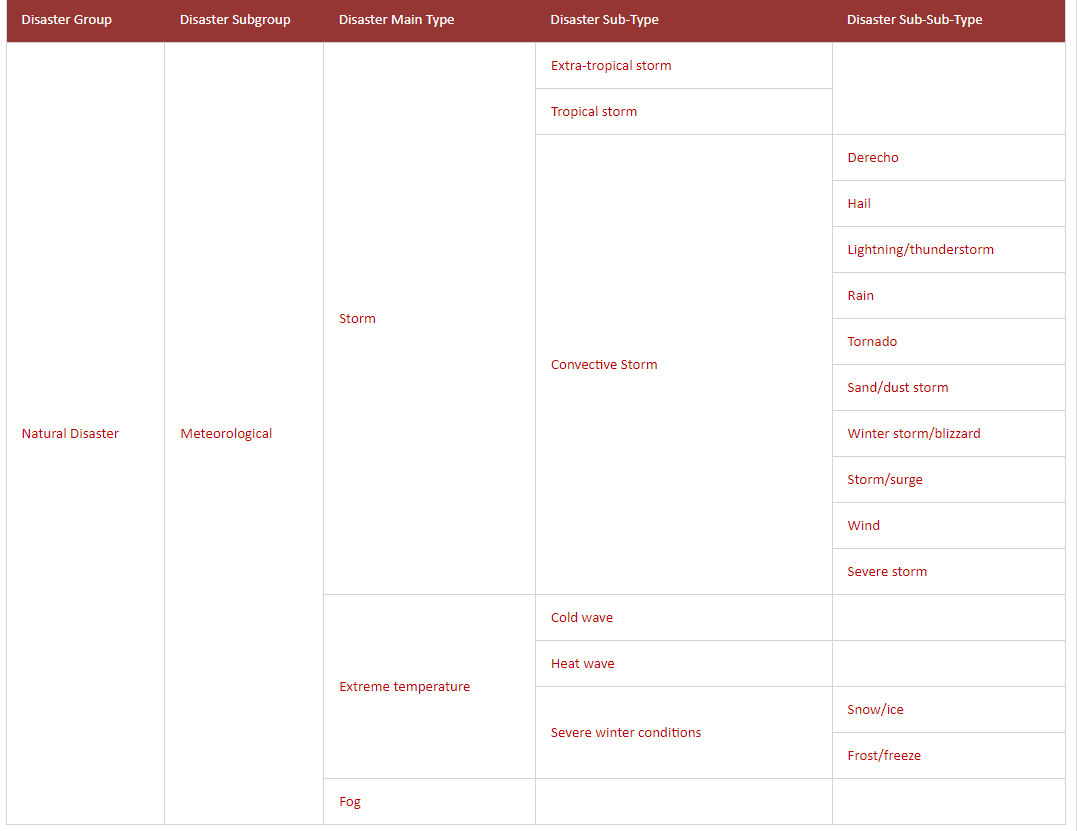


In [ ]:
missing_value = missing_percentage(df_disaster_filter[['Disaster Subtype','Disaster Subsubtype']])
missing_value.sort_values(by="% of Missing Values", ascending = False)

,Features,# Missing Values,% of Missing Values
1,Disaster Subsubtype,14281,93.035831
0,Disaster Subtype,2984,19.439739


In [ ]:
df_disaster_filter['Disaster Subsubtype'].value_counts()

Tornado                    274
Severe storm               236
Winter storm/Blizzard      221
Lightning/Thunderstorms    190
Hail                       109
Sand/Dust storm             18
Snow/Ice                     6
Mudslide                     5
Derecho                      4
Storm/Surge                  3
Sudden subsidence            2
Rain                         1
Name: Disaster Subsubtype, dtype: int64

In [ ]:
filtro = "Convective storm"
df_disaster_filter_Subgroup = df_disaster_filter[df_disaster_filter["Disaster Subtype"] == filtro]

disasters_by_year_subsubtype = df_disaster_filter_Subgroup.groupby(by=["Year","Disaster Subsubtype"])["Country"].count().reset_index()

disasters_by_year_subsubtype.columns = ["Year","Disaster Subsubtype", "Count"]

fig = px.line(disasters_by_year_subsubtype, x="Year", y="Count", color='Disaster Subsubtype', title=f'# Disasters by Year by {filtro}')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

fig.show()

##### Cost Variable

Analyzing the economic cost related columns.

In [ ]:
cost_variable = ["CPI", "Total Damages, Adjusted ('000 US$)", "Total Damages ('000 US$)", "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)", "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)"]

In [ ]:
missing_value = missing_percentage(df_disaster_filter[cost_variable])
missing_value.sort_values(by="% of Missing Values", ascending = False)

,Features,# Missing Values,% of Missing Values
5,Reconstruction Costs ('000 US$),15317,99.785016
6,"Reconstruction Costs, Adjusted ('000 US$)",15317,99.785016
3,Insured Damages ('000 US$),14248,92.820847
4,"Insured Damages, Adjusted ('000 US$)",14248,92.820847
1,"Total Damages, Adjusted ('000 US$)",10178,66.306189
2,Total Damages ('000 US$),10178,66.306189
0,CPI,0,0.000000


We can see that four columns have 92% of data missing. However the true reason to delete those columns is because we are only interested in the damages cost and not the Reconstruction costs or Insured damages. Just like the CPI (Consumer Price Index), which is information that is not valuable to our analysis, which we will also remove.

In [ ]:
cost_eliminar = ["CPI", "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)", "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)"]
df_disaster_filter.drop(cost_eliminar, axis=1, inplace=True)

We can check the total disaster cost per year. 

In [ ]:
df_disaster_filter["Total Damages, Adjusted ('000 US$)"].isnull().sum()

10178

Null data can be assumed as disasters that didn't have monetary costs. We can replace them with zeros. 

In [ ]:
df_disaster_filter["Total Damages, Adjusted ('000 US$)"].fillna(0, inplace=True)  

The average of costs per year is:

In [ ]:
Total_damage_mean_Year = df_disaster_filter.groupby(by="Year")["Total Damages, Adjusted ('000 US$)"].mean().reset_index()
Total_damage_mean_Year.columns = ["Year","Total Damages, Adjusted ('000 US$) MEAN"]
Total_damage_mean_Year

,Year,"Total Damages, Adjusted ('000 US$) MEAN"
0,1960,436737.282051
1,1961,150167.413793
2,1962,472285.620690
3,1963,378873.090909
4,1964,334383.920635
...,...,...
57,2017,971620.134771
58,2018,431602.625749
59,2019,245381.052752
60,2020,447546.879012


In [ ]:
fig = px.bar(Total_damage_mean_Year, x="Year", y="Total Damages, Adjusted ('000 US$) MEAN", title='Mean cost of disasters by year')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

The total disaster cost per year is:

In [ ]:
Total_damage_sum_Year = df_disaster_filter.groupby(by="Year")["Total Damages, Adjusted ('000 US$)"].sum().reset_index()
Total_damage_sum_Year.columns = ["Year","Total Damages, Adjusted ('000 US$) SUM"]
Total_damage_sum_Year

,Year,"Total Damages, Adjusted ('000 US$) SUM"
0,1960,17032754.0
1,1961,4354855.0
2,1962,13696283.0
3,1963,16670416.0
4,1964,21066187.0
...,...,...
57,2017,360471070.0
58,2018,144155277.0
59,2019,106986139.0
60,2020,181256486.0


In [ ]:
fig = px.bar(Total_damage_sum_Year, x="Year", y="Total Damages, Adjusted ('000 US$) SUM", title='Toal cost of disasters by year')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

The total disaster cost per year and disaster types is:

In [ ]:
Total_damage_sum_Year_disaster = df_disaster_filter.groupby(by=["Year", "Disaster Subgroup"])["Total Damages, Adjusted ('000 US$)"].sum().reset_index()
Total_damage_sum_Year_disaster.columns = ["Year","Disaster Subgroup", "Total Damages, Adjusted ('000 US$) SUM"]
Total_damage_sum_Year_disaster

NameError: ignored

In [ ]:
fig = px.bar(Total_damage_sum_Year_disaster, x="Year", y="Total Damages, Adjusted ('000 US$) SUM", color= "Disaster Subgroup", title='Toal cost of disasters by year')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

##### Geographical variables

In [ ]:
df_disaster_filter.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country',
       'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis',
       'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration',
       'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude',
       'Longitude', 'River Basin', 'Start Month', 'End Year', 'End Month',
       'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Total Damages ('000 US$)',
       'Total Damages, Adjusted ('000 US$)', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [ ]:
Geo_variable = ['Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Latitude', 'Longitude', 'Geo Locations']

In [ ]:
missing_value = missing_percentage(df_disaster_filter[Geo_variable])
missing_value.sort_values(by="% of Missing Values", ascending = False)

,Features,# Missing Values,% of Missing Values
6,Latitude,12931,84.241042
7,Longitude,12927,84.214984
5,Origin,11508,74.970684
8,Geo Locations,7245,47.198697
4,Location,1516,9.876221
0,Country,0,0.000000
1,ISO,0,0.000000
2,Region,0,0.000000
3,Continent,0,0.000000


In [ ]:
df_disaster_filter[Geo_variable]

,Country,ISO,Region,Continent,Location,Origin,Latitude,Longitude,Geo Locations
285,Chile,CHL,South America,Americas,"Puerto Montt, Valdivia (Arauco peninsula)",NaN,-38.143,-73.407,NaN
286,Anguilla,AIA,Caribbean,Americas,South Hille and West End,NaN,NaN,NaN,NaN
287,Netherlands Antilles,ANT,Caribbean,Americas,"St Martin Isl., Saba",NaN,NaN,NaN,NaN
288,Antigua and Barbuda,ATG,Caribbean,Americas,NaN,NaN,NaN,NaN,NaN
289,Bangladesh,BGD,Southern Asia,Asia,"Noakhali, Off-Shore Islands",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16251,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,Tshopo province,NaN,NaN,NaN,Tshopo (Adm2).
16252,Serbia,SRB,Southern Europe,Europe,"Zitoradja (Toplicki), Doljevac (Nisavski) , Di...",Heavy rains,NaN,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."
16253,South Sudan,SSD,Northern Africa,Africa,"Mayendit County (Unity); Ayod, Fangak Counties...",Heavy rains,NaN,NaN,"Northern Bahr El Ghazal, Unity, Upper Nile, Wa..."
16254,Pakistan,PAK,Southern Asia,Asia,"Khyber Pakhtunkhwa, Punjab, Balochistan, Sindh",Monsoonal rain,NaN,NaN,"Balochistan, Punjab, Sindh (Adm1). Khyber Agen..."


The continent with biggest number of reported disasters is ASIA.

In [ ]:
df_disaster_filter["Continent"].value_counts()

Asia        6103
Americas    3734
Africa      2906
Europe      1917
Oceania      690
Name: Continent, dtype: int64

The region with the biggest number of reported disasters is Southern ASIA and in the fourth place we can see South America.

In [ ]:
df_disaster_filter["Region"].value_counts()

Southern Asia                1953
South-Eastern Asia           1898
Eastern Asia                 1665
South America                1239
Eastern Africa               1156
Northern America             1134
Central America               788
Western Africa                782
Southern Europe               609
Caribbean                     573
Eastern Europe                537
Western Europe                513
Western Asia                  446
Middle Africa                 428
Northern Africa               332
Australia and New Zealand     320
Melanesia                     240
Northern Europe               209
Southern Africa               208
Central Asia                  141
Polynesia                      86
Russian Federation             49
Micronesia                     44
Name: Region, dtype: int64

In [ ]:
df_disaster_filter["Country"].value_counts()

United States of America (the)                  1003
China                                            914
India                                            703
Philippines (the)                                638
Indonesia                                        559
                                                ... 
United Arab Emirates (the)                         1
Equatorial Guinea                                  1
Saint Helena, Ascension and Tristan da Cunha       1
Brunei Darussalam                                  1
Isle of Man                                        1
Name: Country, Length: 228, dtype: int64

We will remove the Geo locations since this is similar in information to location column. Having this last one more data.

In [ ]:
df_disaster_filter.drop(["Geo Locations"], axis=1, inplace=True)

##### Casualties Variables

In [ ]:
Casualties_variable = ['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected']

In [ ]:
missing_value = missing_percentage(df_disaster_filter[Casualties_variable])
missing_value.sort_values(by="% of Missing Values", ascending = False)

,Features,# Missing Values,% of Missing Values
3,No Homeless,13016,84.794788
1,No Injured,11526,75.087948
2,No Affected,6119,39.863192
0,Total Deaths,4632,30.175896
4,Total Affected,3867,25.192182


In [ ]:
df_disaster_filter[Casualties_variable].head()

,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
285,6000.0,3000.0,2000000.0,NaN,2003000.0
286,5.0,250.0,NaN,1000.0,1250.0
287,NaN,NaN,NaN,NaN,NaN
288,2.0,NaN,NaN,NaN,NaN
289,3000.0,NaN,NaN,NaN,NaN


In [ ]:
df_disaster_filter["Total Deaths"].describe().round(2)

count      10718.00
mean         507.97
std        15818.70
min            1.00
25%            5.00
50%           17.00
75%           53.00
max      1500000.00
Name: Total Deaths, dtype: float64

In [ ]:
df_disaster_filter["No Injured"].describe().round(2)

count       3824.00
mean        2598.92
std        34688.84
min            1.00
25%           13.00
50%           50.00
75%          200.00
max      1800000.00
Name: No Injured, dtype: float64

In [ ]:
df_disaster_filter["No Affected"].describe().round(1)

count         9231.0
mean        877429.7
std        8566186.2
min              1.0
25%           1200.0
50%          10000.0
75%          90000.0
max      330000000.0
Name: No Affected, dtype: float64

In [ ]:
df_disaster_filter["No Homeless"].describe().round(1)

count        2334.0
mean        73463.8
std        528415.9
min             3.0
25%           536.2
50%          3000.0
75%         17117.8
max      15850000.0
Name: No Homeless, dtype: float64

In [ ]:
df_disaster_filter["Total Affected"].describe().round(1)

count        11483.0
mean        721149.2
std        7760665.1
min              1.0
25%            656.0
50%           6000.0
75%          58614.0
max      330000000.0
Name: Total Affected, dtype: float64

In general, using the variables related to the victims ('Total Deaths', 'Not Injured', 'Not Affected',
'No Homeless', 'Total Affected'), the mean is greater than the median value. This shows distributions
with positive bias. The median, being a robust measure, indicates the presence of empty cells that are being
assuming as zero. Not having values in these variables can be taken as that there were no victims involved.

It can also be seeing that the maximum value of these columns are too far from the mean of the data what can be better appreciate in a box plot.

In [ ]:
fig = px.box(df_disaster_filter, y="Total Deaths")
fig.show()

This shows us that certain disasters were extremely catastrophic in human lives

In [ ]:
df_disaster_filter[df_disaster_filter["Total Deaths"] > 200000]

,Year,Seq,Glide,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,...,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",Adm Level,Admin1 Code,Admin2 Code
518,1970,63,NaN,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,...,300000.0,NaN,3648000.0,NaN,3648000.0,86400.0,603008.0,NaN,NaN,NaN
720,1976,50,NaN,Geophysical,Earthquake,Ground movement,NaN,NaN,China,CHN,...,242000.0,164000.0,NaN,NaN,164000.0,5600000.0,26664468.0,NaN,NaN,NaN
1350,1965,9073,NaN,Climatological,Drought,Drought,NaN,NaN,India,IND,...,1500000.0,NaN,100000000.0,NaN,100000000.0,100000.0,859994.0,NaN,NaN,NaN
2270,1983,9060,NaN,Climatological,Drought,Drought,NaN,NaN,Ethiopia,ETH,...,300000.0,NaN,7750000.0,NaN,7750000.0,NaN,0.0,NaN,NaN,NaN
11464,2010,17,EQ-2010-000009,Geophysical,Earthquake,Ground movement,NaN,NaN,Haiti,HTI,...,222570.0,300000.0,3400000.0,NaN,3700000.0,8000000.0,9941311.0,2,NaN,17168;17177;17194;17197;17198;17201;17203


We can also see that the more deathly disasters are the Climatological followed by the Geophysical.

In [ ]:
df_disaster_filter.groupby(by=["Disaster Subgroup"])["Total Deaths"].sum().reset_index().sort_values(by="Total Deaths", ascending=False)

,Disaster Subgroup,Total Deaths
1,Climatological,2214491.0
2,Geophysical,1406295.0
4,Meteorological,1142515.0
3,Hydrological,410907.0
0,Biological,270217.0


For this project we are going to keep "Total Deaths" and "Total Affected".  Since "Toal Affecte" = No Injured + No Affected + No Homeless

In [ ]:
df_disaster_filter.drop(['No Injured', 'No Affected', 'No Homeless'], axis=1, inplace=True)

The total of deaths caused by disasters per year and by type of disasters is:

In [ ]:
Total_death_Year_disaster = df_disaster_filter.groupby(by=["Year", "Disaster Subgroup"])["Total Deaths"].sum().reset_index()
Total_death_Year_disaster.columns = ["Year","Disaster Subgroup", "Total Deaths"]
Total_death_Year_disaster

,Year,Disaster Subgroup,Total Deaths
0,1960,Climatological,0.0
1,1960,Geophysical,18831.0
2,1960,Hydrological,10629.0
3,1960,Meteorological,9164.0
4,1961,Climatological,0.0
...,...,...,...
300,2021,Biological,3880.0
301,2021,Climatological,128.0
302,2021,Geophysical,2827.0
303,2021,Hydrological,4368.0


In [ ]:
fig = px.bar(Total_death_Year_disaster, x="Year", y="Total Deaths", color= "Disaster Subgroup", title='Total deaths of disasters by year')
fig.update_layout(modebar_add=["v1hovermode", "toggleSpikeLines"])

##### Others Variables

In [ ]:
Other_variable = ['Seq', 'Glide','Adm Level', 'Admin1 Code', 'Admin2 Code', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution']

In [ ]:
missing_value = missing_percentage(df_disaster_filter[Other_variable])
missing_value.sort_values(by="% of Missing Values", ascending = False)

,Features,# Missing Values,% of Missing Values
10,Aid Contribution,14673,95.589577
6,Associated Dis2,14640,95.374593
1,Glide,13739,89.504886
7,OFDA Response,13657,88.970684
8,Appeal,12851,83.719870
9,Declaration,12146,79.127036
5,Associated Dis,12036,78.410423
4,Admin2 Code,11261,73.361564
3,Admin1 Code,10606,69.094463
2,Adm Level,7245,47.198697


In [ ]:
df_disaster_filter[Other_variable]

,Seq,Glide,Adm Level,Admin1 Code,Admin2 Code,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution
285,13,NaN,NaN,NaN,NaN,Volcanic activity,Tsunami/Tidal wave,NaN,NaN,NaN,NaN
286,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
287,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16251,599,EP-2021-000138,2,NaN,14994,NaN,NaN,NaN,NaN,Yes,NaN
16252,20,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,NaN,NaN,NaN,NaN,Yes,NaN
16253,481,FL-2021-000108,1;2,2747;2754;2765;2768;37021,37052;37054,NaN,NaN,NaN,NaN,NaN,NaN
16254,846,NaN,1;2,2272;2276;2277,23632,NaN,NaN,NaN,NaN,NaN,NaN


This group of variables are not directly related to the established objective of this analysis. Therefore they are not going to be taken into account.

In [ ]:
df_disaster_filter.drop(Other_variable, axis=1, inplace=True)

##### Changing old countries

In [ ]:
df_disaster_filter[df_disaster_filter['ISO']=='DEU']

,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,...,Latitude,Longitude,River Basin,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)"
3912,1990,Meteorological,Storm,NaN,NaN,Daria,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,1.0,1990,1.0,8.0,NaN,1200000.0,2488656.0
3913,1990,Meteorological,Storm,NaN,NaN,Herta,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,2.0,1990,2.0,7.0,NaN,600000.0,1244328.0
3914,1990,Meteorological,Storm,NaN,NaN,Judith,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,2.0,1990,2.0,NaN,NaN,60000.0,124433.0
3915,1990,Meteorological,Storm,NaN,NaN,Ottilie and Polly,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,2.0,1990,2.0,10.0,NaN,180000.0,373298.0
3916,1990,Meteorological,Storm,NaN,NaN,Vivian,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,2.0,1990,2.0,15.0,NaN,1200000.0,2488656.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15021,2019,Meteorological,Extreme temperature,Heat wave,NaN,NaN,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,7.0,2019,7.0,NaN,NaN,NaN,0.0
15095,2020,Meteorological,Storm,Extra-tropical storm,NaN,Storm 'Ciara' (Sabine),Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,2.0,2020,2.0,NaN,33.0,NaN,0.0
15121,2021,Hydrological,Flood,NaN,NaN,NaN,Germany,DEU,Western Europe,Europe,...,NaN,NaN,"Ahr, Volme, Dhünn, Moselle, Inde, Kyll, Jagst ...",7.0,2021,7.0,197.0,1000.0,40000000.0,40000000.0
15135,2021,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,NaN,Germany,DEU,Western Europe,Europe,...,NaN,NaN,NaN,6.0,2021,6.0,NaN,600.0,NaN,0.0


In [ ]:
df_disaster_filter['ISO']= df_disaster_filter['ISO'].replace(['SUN','HKG','SCG','DFR','DDR','YUG','ANT','AZO','BLM','CSK',
                                       'IMN','MAF','SPI','SXM','YMD','YMN'],['RUS','CHI','SRB','DEU',
                                       'DEU','SRB','NLD','PRT','AIA','CZE','GBR','AIA','CAF','AIA','YEM','YEM',])

##### Final data set after cleaning

In [ ]:
df_disaster_filter.head()

,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,...,Latitude,Longitude,River Basin,Start Month,End Year,End Month,Total Deaths,Total Affected,Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)"
285,1960,Geophysical,Earthquake,Tsunami,NaN,NaN,Chile,CHL,South America,Americas,...,-38.143,-73.407,NaN,5.0,1960,5.0,6000.0,2003000.0,550000.0,5039165.0
286,1960,Meteorological,Storm,Tropical cyclone,NaN,Donna,Anguilla,AIA,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960,9.0,5.0,1250.0,35000.0,320674.0
287,1960,Meteorological,Storm,Tropical cyclone,NaN,Donna,Netherlands Antilles,NLD,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960,9.0,NaN,NaN,NaN,0.0
288,1960,Meteorological,Storm,Tropical cyclone,NaN,Donna,Antigua and Barbuda,ATG,Caribbean,Americas,...,NaN,NaN,NaN,9.0,1960,9.0,2.0,NaN,NaN,0.0
289,1960,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,...,NaN,NaN,NaN,10.0,1960,10.0,3000.0,NaN,NaN,0.0


In [ ]:
df_disaster_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15350 entries, 285 to 16255
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                15350 non-null  int64  
 1   Disaster Subgroup                   15350 non-null  object 
 2   Disaster Type                       15350 non-null  object 
 3   Disaster Subtype                    12366 non-null  object 
 4   Disaster Subsubtype                 1069 non-null   object 
 5   Event Name                          3798 non-null   object 
 6   Country                             15350 non-null  object 
 7   ISO                                 15350 non-null  object 
 8   Region                              15350 non-null  object 
 9   Continent                           15350 non-null  object 
 10  Location                            13834 non-null  object 
 11  Origin                              384

In [ ]:
df_disaster_filter.to_excel(clean_data_path + "/Disaster_Clean.xlsx", index=False)

### Climate change Data

#### GlobalLandTemperaturesByCity.csv

This is the source to the dataset: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data.

In [ ]:
# Loading the data file as pandas  dataframe
filename = raw_data_path + '/GlobalLandTemperaturesByCity.csv'
df_temperature_by_city = pd.read_csv(filename)

print(f'This is the file fo this section {filename}')
df_temperature_by_city.head(5)

This is the file fo this section /drive/MyDrive/DS4A - Team 40/00_DATA/00_RAW_DATA/GlobalLandTemperaturesByCity.csv


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
df_temperature_by_city.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


**Variables Available**

**dt**: Date of the sample.

**AverageTemperature**: Average temperature in Celsius degrees. 

**AverageTemperatureUncertainty**: Estimated average error of the temperature in Celsius degrees.  

**City**:  City where the sample was taken.

**Country**:  Country where the sample was taken.

**Latitude**: Exact Latitude where the sample was taken.

**Longitude**: Exact Longitude where the sample was taken.


##### Exploration

In [ ]:
print(f'The file has a total number of {len(df_temperature_by_city.columns.values)} columns, which have the following names: {df_temperature_by_city.columns.values}')

The file has a total number of 7 columns, which have the following names: ['dt' 'AverageTemperature' 'AverageTemperatureUncertainty' 'City'
 'Country' 'Latitude' 'Longitude']


In [ ]:
df_temperature_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


##### Date variable


In [ ]:
date_variable = ["dt"]
df_temperature_by_city[date_variable].head(10)

,dt
0,1743-11-01
1,1743-12-01
2,1744-01-01
3,1744-02-01
4,1744-03-01
5,1744-04-01
6,1744-05-01
7,1744-06-01
8,1744-07-01
9,1744-08-01


Since we want to work with years and months, we'll create separate columns with this variables.

In [ ]:
df_temperature_by_city["dt"] = pd.to_datetime(df_temperature_by_city["dt"])
df_temperature_by_city["Year"] = df_temperature_by_city["dt"].dt.year
df_temperature_by_city["Month"] = df_temperature_by_city["dt"].dt.month
df_temperature_by_city["Day"] = df_temperature_by_city["dt"].dt.day
df_temperature_by_city[["Year","Month"]]
df_temperature_by_city[["Day"]]

,Day
0,1
1,1
2,1
3,1
4,1
...,...
8599207,1
8599208,1
8599209,1
8599210,1


Let's check how many years we have in the dataset.

In [ ]:
df_temperature_by_city["Year"].unique()

array([1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753,
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764,
       1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775,
       1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
       1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
       1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830,
       1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1888, 1889, 1890, 1891, 1892, 18

In [ ]:
# Number of data entries we have per year
columna_analizar = "Year"
temp_by_year = df_temperature_by_city[columna_analizar].value_counts().to_frame().reset_index()
temp_by_year.columns = [columna_analizar, "Count"]
temp_by_year = temp_by_year.sort_values(by=columna_analizar,ascending = False )
temp_by_year.head(10)

,Year,Count
172,2013,31590
115,2012,42120
100,2011,42120
99,2010,42120
98,2009,42120
69,2008,42120
70,2007,42120
71,2006,42120
72,2005,42120
73,2004,42120


In [ ]:
fig = px.line(temp_by_year, x="Year", y="Count", title='Number of Rows Available by Year')
fig.show()

We will only consider data for years after 1960 since that's what we have available across all datasets.

In [ ]:
df_temp_filter = df_temperature_by_city[(df_temperature_by_city["Year"] >= 1960) & (df_temperature_by_city["Year"] < 2022) ]
df_temp_filter["Year"].unique()

In [ ]:
# Let's check how rich is our filtered dataset
columna_analizar = "Year"
temp_by_year = df_temp_filter[columna_analizar].value_counts().to_frame().reset_index()
temp_by_year.columns = [columna_analizar, "Count"]
temp_by_year = temp_by_year.sort_values(by=columna_analizar,ascending = False )

fig = px.line(temp_by_year, x="Year", y="Count", title='Number of Rows Available by Year (1960 - 2013)')
fig.show()

##### Temperature Variables

In [ ]:
df_temp_filter.head()

Let's check the average global temperature per year.

In [ ]:
temp_by_year = df_temp_filter.groupby(['Year'])['AverageTemperature'].mean().to_frame().reset_index()
temp_by_year.head(10)

The following graph shows that in rough terms, global temperature has been on the raise since 1960. 

In [ ]:
fig = px.line(temp_by_year, x="Year", y="AverageTemperature", title='World Temperature (1960 - 2013)')
fig.show()

##### Missing values

In [ ]:
missing_value = missing_percentage(df_temp_filter)
missing_value.sort_values(by="% of Missing Values", ascending = False)

The table above shows that roughly 0.14% of AverageTemperature and AverageTemperatureUncertainty is missing. The number of missing values is so low that the heatmap below doesn't show them.

In [ ]:
fig = plt.figure(figsize=(18,12))
sns.heatmap(df_temp_filter.isnull(), cmap="Greys")

##### Final Dataset After Cleaning

In [ ]:
df_temp_filter.head()

****